# Session 1: Introduction To Extraction Workshop - HTML & APIs

Immanuel Williams & Ciera Millard  
2025-07-16

[Download Empty .qmd file](01_Extraction_Introduction.qmd)

[Download Answers .qmd file](01_Extraction_Introduction.qmd)

# Session 1: Introduction to Data Extraction

## Part 0. Workshop Logistics

#### How We’ll Work Together

-   **Interactive Format**: This workshop is designed to be interactive,
    with a mix of short lectures followed by hands-on activities.

-   **Questions Are Highly Encouraged**: Curiosity is key to learning,
    so please ask anything that comes to mind. To keep us on track and
    ensure all topics are covered, we’ll handle questions as follows:

    -   If your question is about a topic we will get to later, I’ll
        make a note of it and we will address it when we reach that
        section.

    -   If a question is beyond the scope of this particular workshop,
        I’ll let you know, and we can discuss it after the session.

#### Our Technical Setup

-   **Platform**: All of our work today will be done within the
    **CourseKata** platform. This environment is pre-configured to
    ensure everything runs smoothly for everyone.

-   **Packages and Libraries**: The platform comes with almost all
    required R packages pre-installed. We will only need to install
    **one package** before we need it, and I will guide you through that
    simple process.

-   **Fill-in-the-Blank Exercises**: Our coding activities use a
    “fill-in-the-blank” style. The goal is to help you focus on the core
    concepts without getting bogged down by minor syntax details.

-   **Clear Function Calls**: For maximum clarity, we will explicitly
    name all arguments in function calls (e.g.,
    `read_html(url = my_url)`). This makes it easy to see exactly what
    each part of the function is doing.

## Part 1. Goals & Objectives (Entire workshop)

**Session 1: Introduction**

Understand the importance of extracting **dynamic data** (via HTML and
APIs) in modern data analysis and teaching

**Session 2: Getting Weather Data via OpenWeather API**

In this session, we dive into OpenWeather API and learn to use packages
like httr2 to execute API calls. We will also discuss URLs, queries,
data structures, and more.

**Session 3: Scraping NFL Sports Data**

In this session, we will use Pro-Football Reference to learn how to
extract and clean HTML table data for use in statistical analysis and
visualizations.

**Session 4: Putting it All Together (Project)**

In this project, we will use HTML scraping joined with the OpenWeather
API to create our own cloropleth map of Iowa.

<figure>
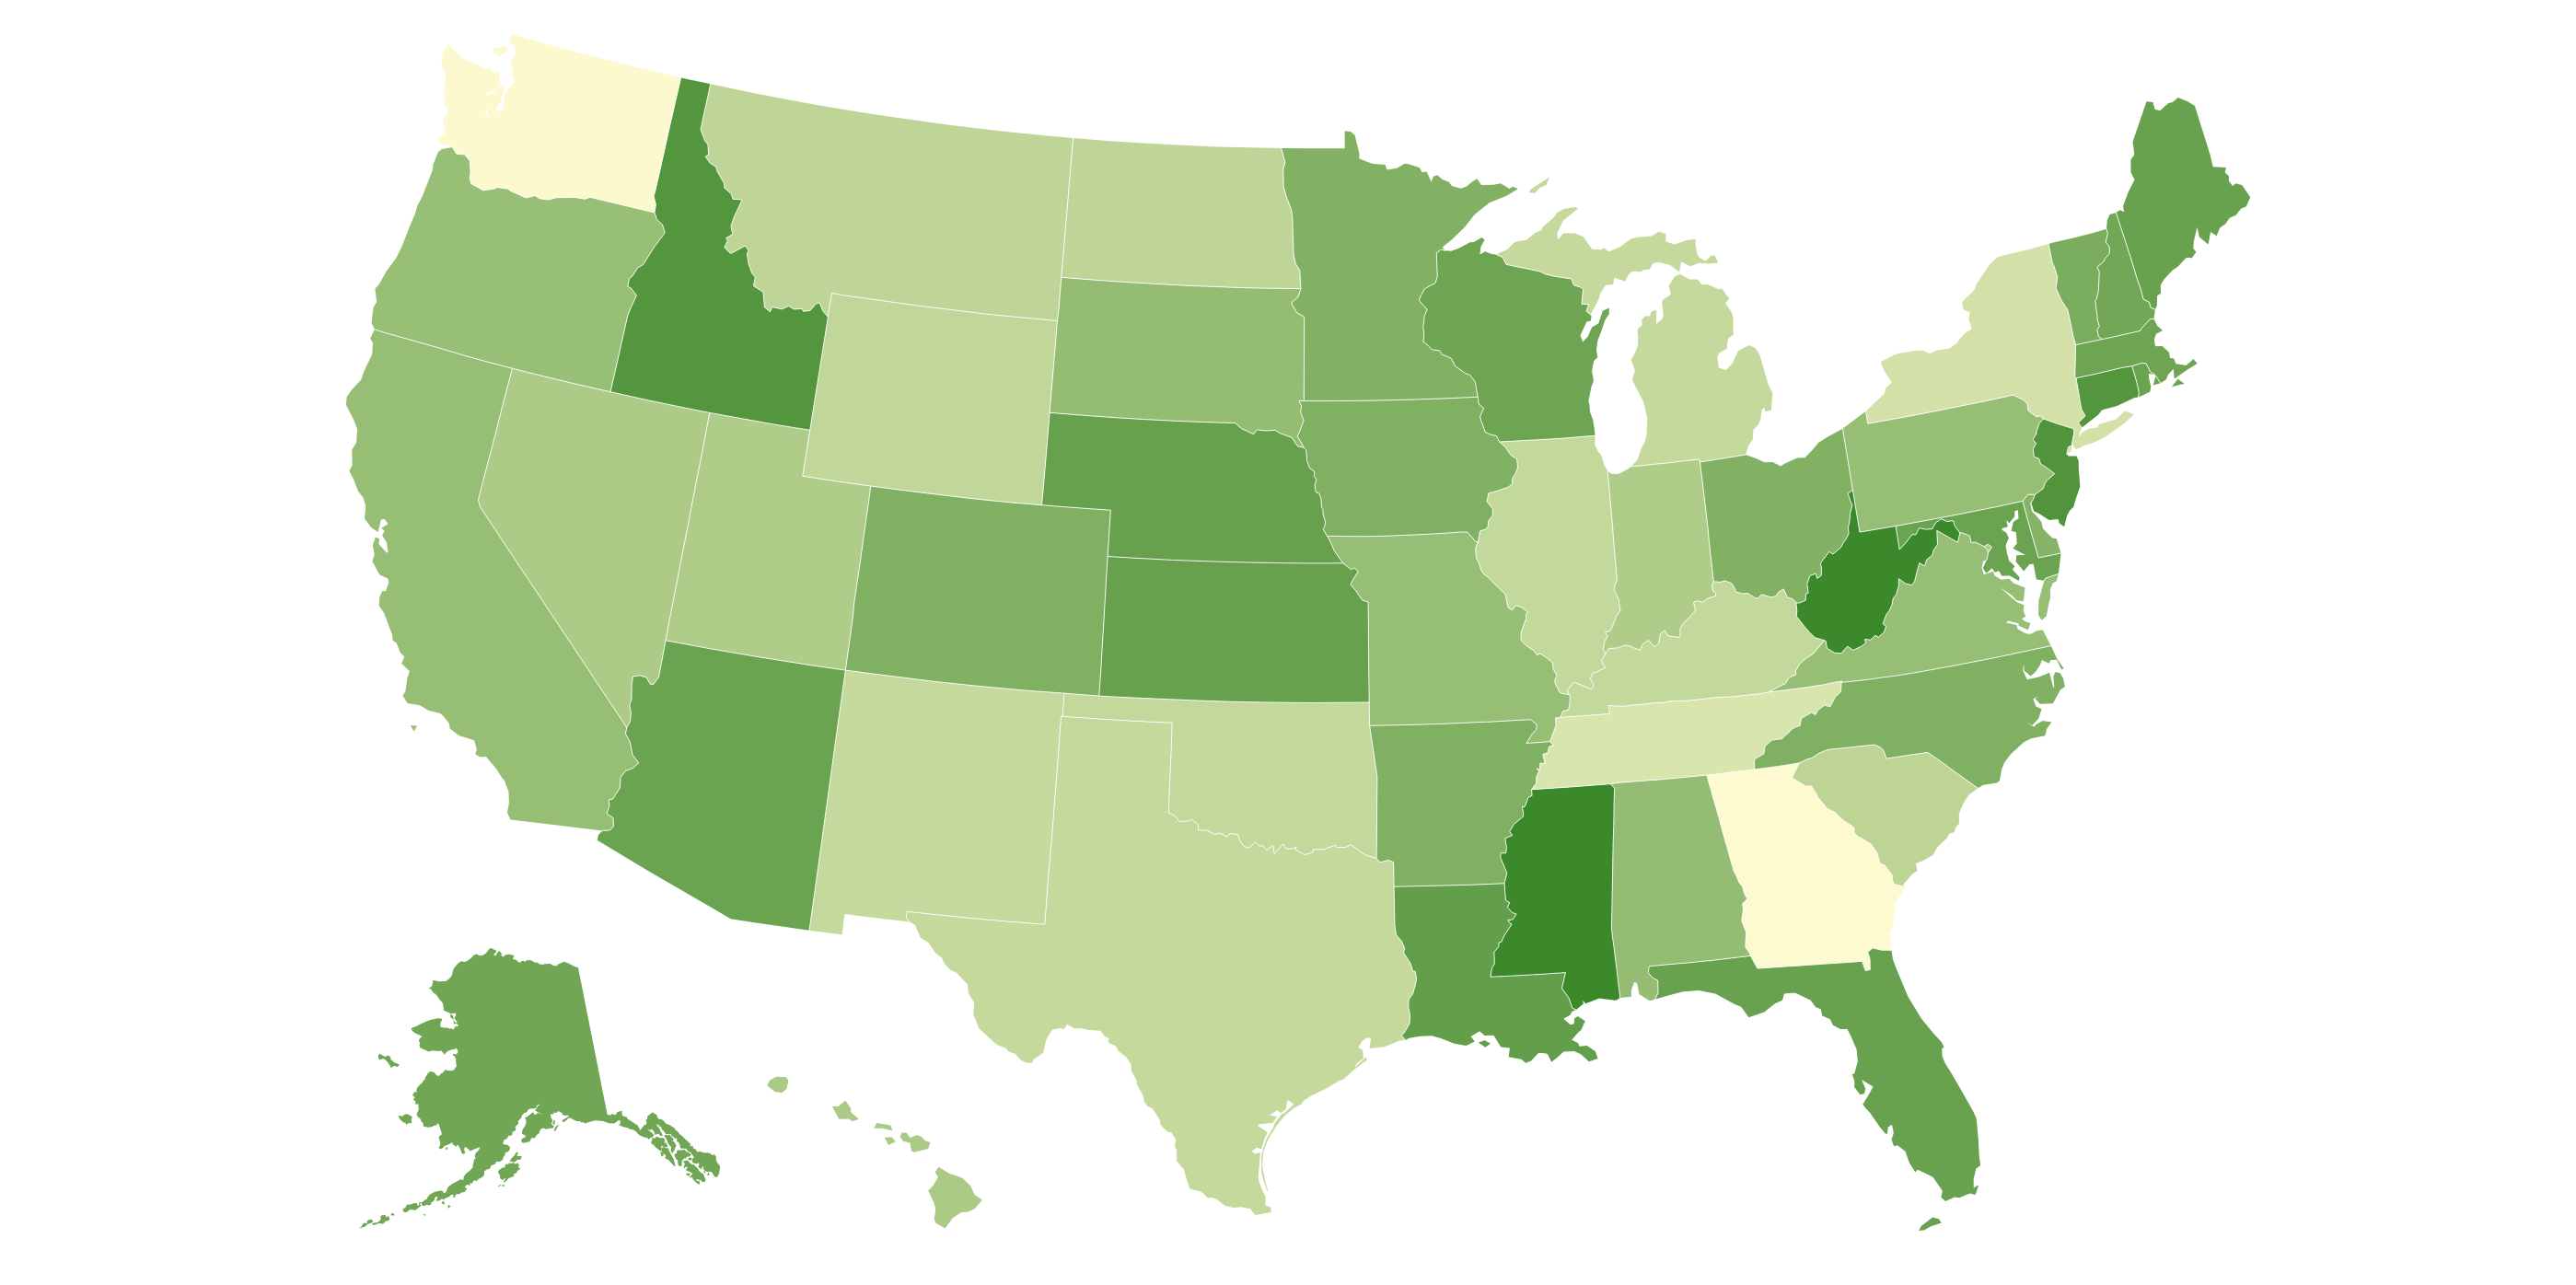
<figcaption aria-hidden="true">We will make a graph similar to this
(geoapify.com)</figcaption>
</figure>

### 1.a. Goals for Introduction

-   Analyzed static player statistics by loading an Excel file into R to
    filter the data and create a comparative boxplot.

-   Introduced **dynamic data** extraction by explaining how to use web
    APIs to send a request containing a query for structured JSON data
    from external servers.

-   Demonstrated web scraping by using an R package to directly extract
    a data table from an HTML webpage that can be used with **dynamic
    data**.

-   Advocated for a modern educational approach that teaches students to
    actively find and extract live data rather than passively using
    clean, static files.

## Part 2. Conceptual Foundation

### 1. Traditional Approach

-   My mentor, Allan, says “ask good questions”…

-   Statistical Question: **Who had the most impactful first season in
    terms of points: Michael Jordan, LeBron James, or Kobe Bryant?**

<figure>
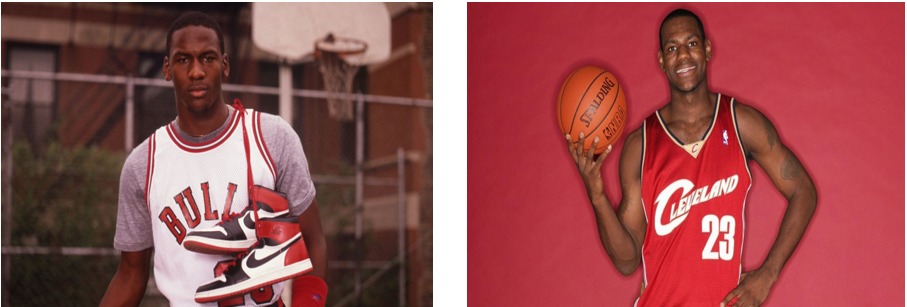
<figcaption aria-hidden="true">MJ vs LJ</figcaption>
</figure>

<figure>
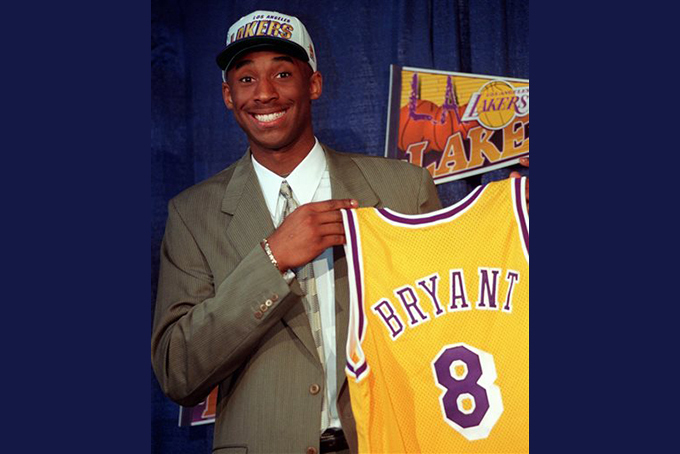
<figcaption aria-hidden="true">KB</figcaption>
</figure>

-   Let’s answer this question.

-   We’ll begin by working with a static excel file, named
    `nba_data.xlsx`, that contains per-game stats for each player’s 15
    seasons in the NBA.

**Step 1.** Fill in the code based common tidyverse packages.

In [ ]:
## EMPTY VERSION
# library(____)        ## Data Extraction      --- E
# library(____)      ## Data Extraction      --- E
# library(____)       ## Data Transformation  --- T
# library(____)     ## Data Visualization   --- V

In [ ]:
## FILLED VERSION
library(here)        ## Data Extraction      --- E
library(readxl)      ## Data Extraction      --- E
library(dplyr)       ## Data Transformation  --- T
library(ggplot2)     ## Data Visualization   --- V

**Step 2.** Complete the appropriate function name and fill in the file
name into below.

In [ ]:
## EMPTY VERSION
# file_path <- here("sessions", "____","____","____")
# nba_df <- read_*("____", sheet = "modern_nba_legends_08302019")

In [ ]:
## FILLED VERSION
file_path <- here("sessions", "session_1","data","nba_data.xlsx")
nba_df <- read_xlsx(file_path, sheet = "modern_nba_legends_08302019")

-   Let’s view the data …

**Step 3.** Use the `glimpse` function to view the data

In [ ]:
## EMPTY VERSION

In [ ]:
## FILLED VERSION
glimpse(nba_df)

####——————— \#### Q1.

First, take a moment to look over the data yourself. Then, discuss with
your peers if you see any issues that need cleaning.

#### Ans Q1.

The dataset is clean; the data types are properly assigned, with numeric
variables stored as numbers and categorical variables stored as
characters.

####———————

Note 1: Look at the season variable

-   Now let’s clean the focus on the data frame that we are after

**Step 4.** Use the `filter()` function to select only the rows where
the `Season` column is equal to “season_1”.

In [ ]:
## FILLED VERSION
season_1_df <- nba_df %>% 
  filter(Season == "season_1")

In [ ]:
## EMPTY VERSION
# season_1_df <- nba_df %>% 
#   ___( _____ == "season_1")

-   Now lets look at a plot of their points to answer the statistical
    question

**Step 5.** Pipe the `season_1_df` data into `ggplot`, map the `Name`
column to the x-axis and `PTS` to the y-axis, and then add a
`geom_boxplot()` layer to visualize the data.

In [ ]:
## EMPTY VERSION
# ____ %>% 
#   ggplot(aes(x = ____, y = ____)) +
#   geom_*() +
#   theme_bw()

In [ ]:
## FILLED VERSION
season_1_df %>% 
  ggplot(aes(x = Name, y = PTS)) +
  geom_boxplot() +
  theme_bw() 

-   Note 2: We could have spruced it up but here we just wanted to
    answer the question, if you have the urge please do so.

####——————— \#### Q2.

What conclusions could be made about this plot?

#### Ans Q2.

Based on the median values, Michael Jordan (MJ) had the most impressive
1st season, followed by LeBron James (LJ), and then Kobe Bryant (KB).

The plot also reveals that MJ’s scoring was the most variable and
reached the highest peak, while KB’s point distribution was the lowest
and most concentrated. ####———————

**Are there only 3 players that only played in the NBA?**

-   Now what about, Magic Johnson or Wilt Chamberlain (historic players)

<figure>
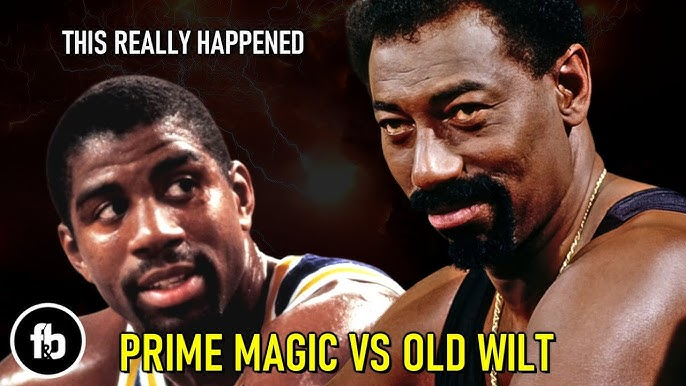
<figcaption aria-hidden="true">Historic Players</figcaption>
</figure>

-   Maybe Luka Dončić or Ja Morant (more recent players)

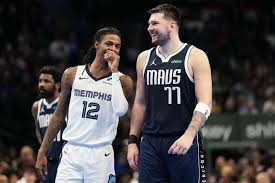

-   If I wanted to add this data I need to go to the original source not
    an excel sheet to do this

### 2. Active Data Extraction

-   **A New Mindset**

-   Shift students from passive data users to **active data seekers**.

-   Move beyond “waiting for clean data” to *learning how to access,
    validate, and clean it*.

-   Teach both the **skill to extract** and the **capacity to teach
    extraction**.

<figure>
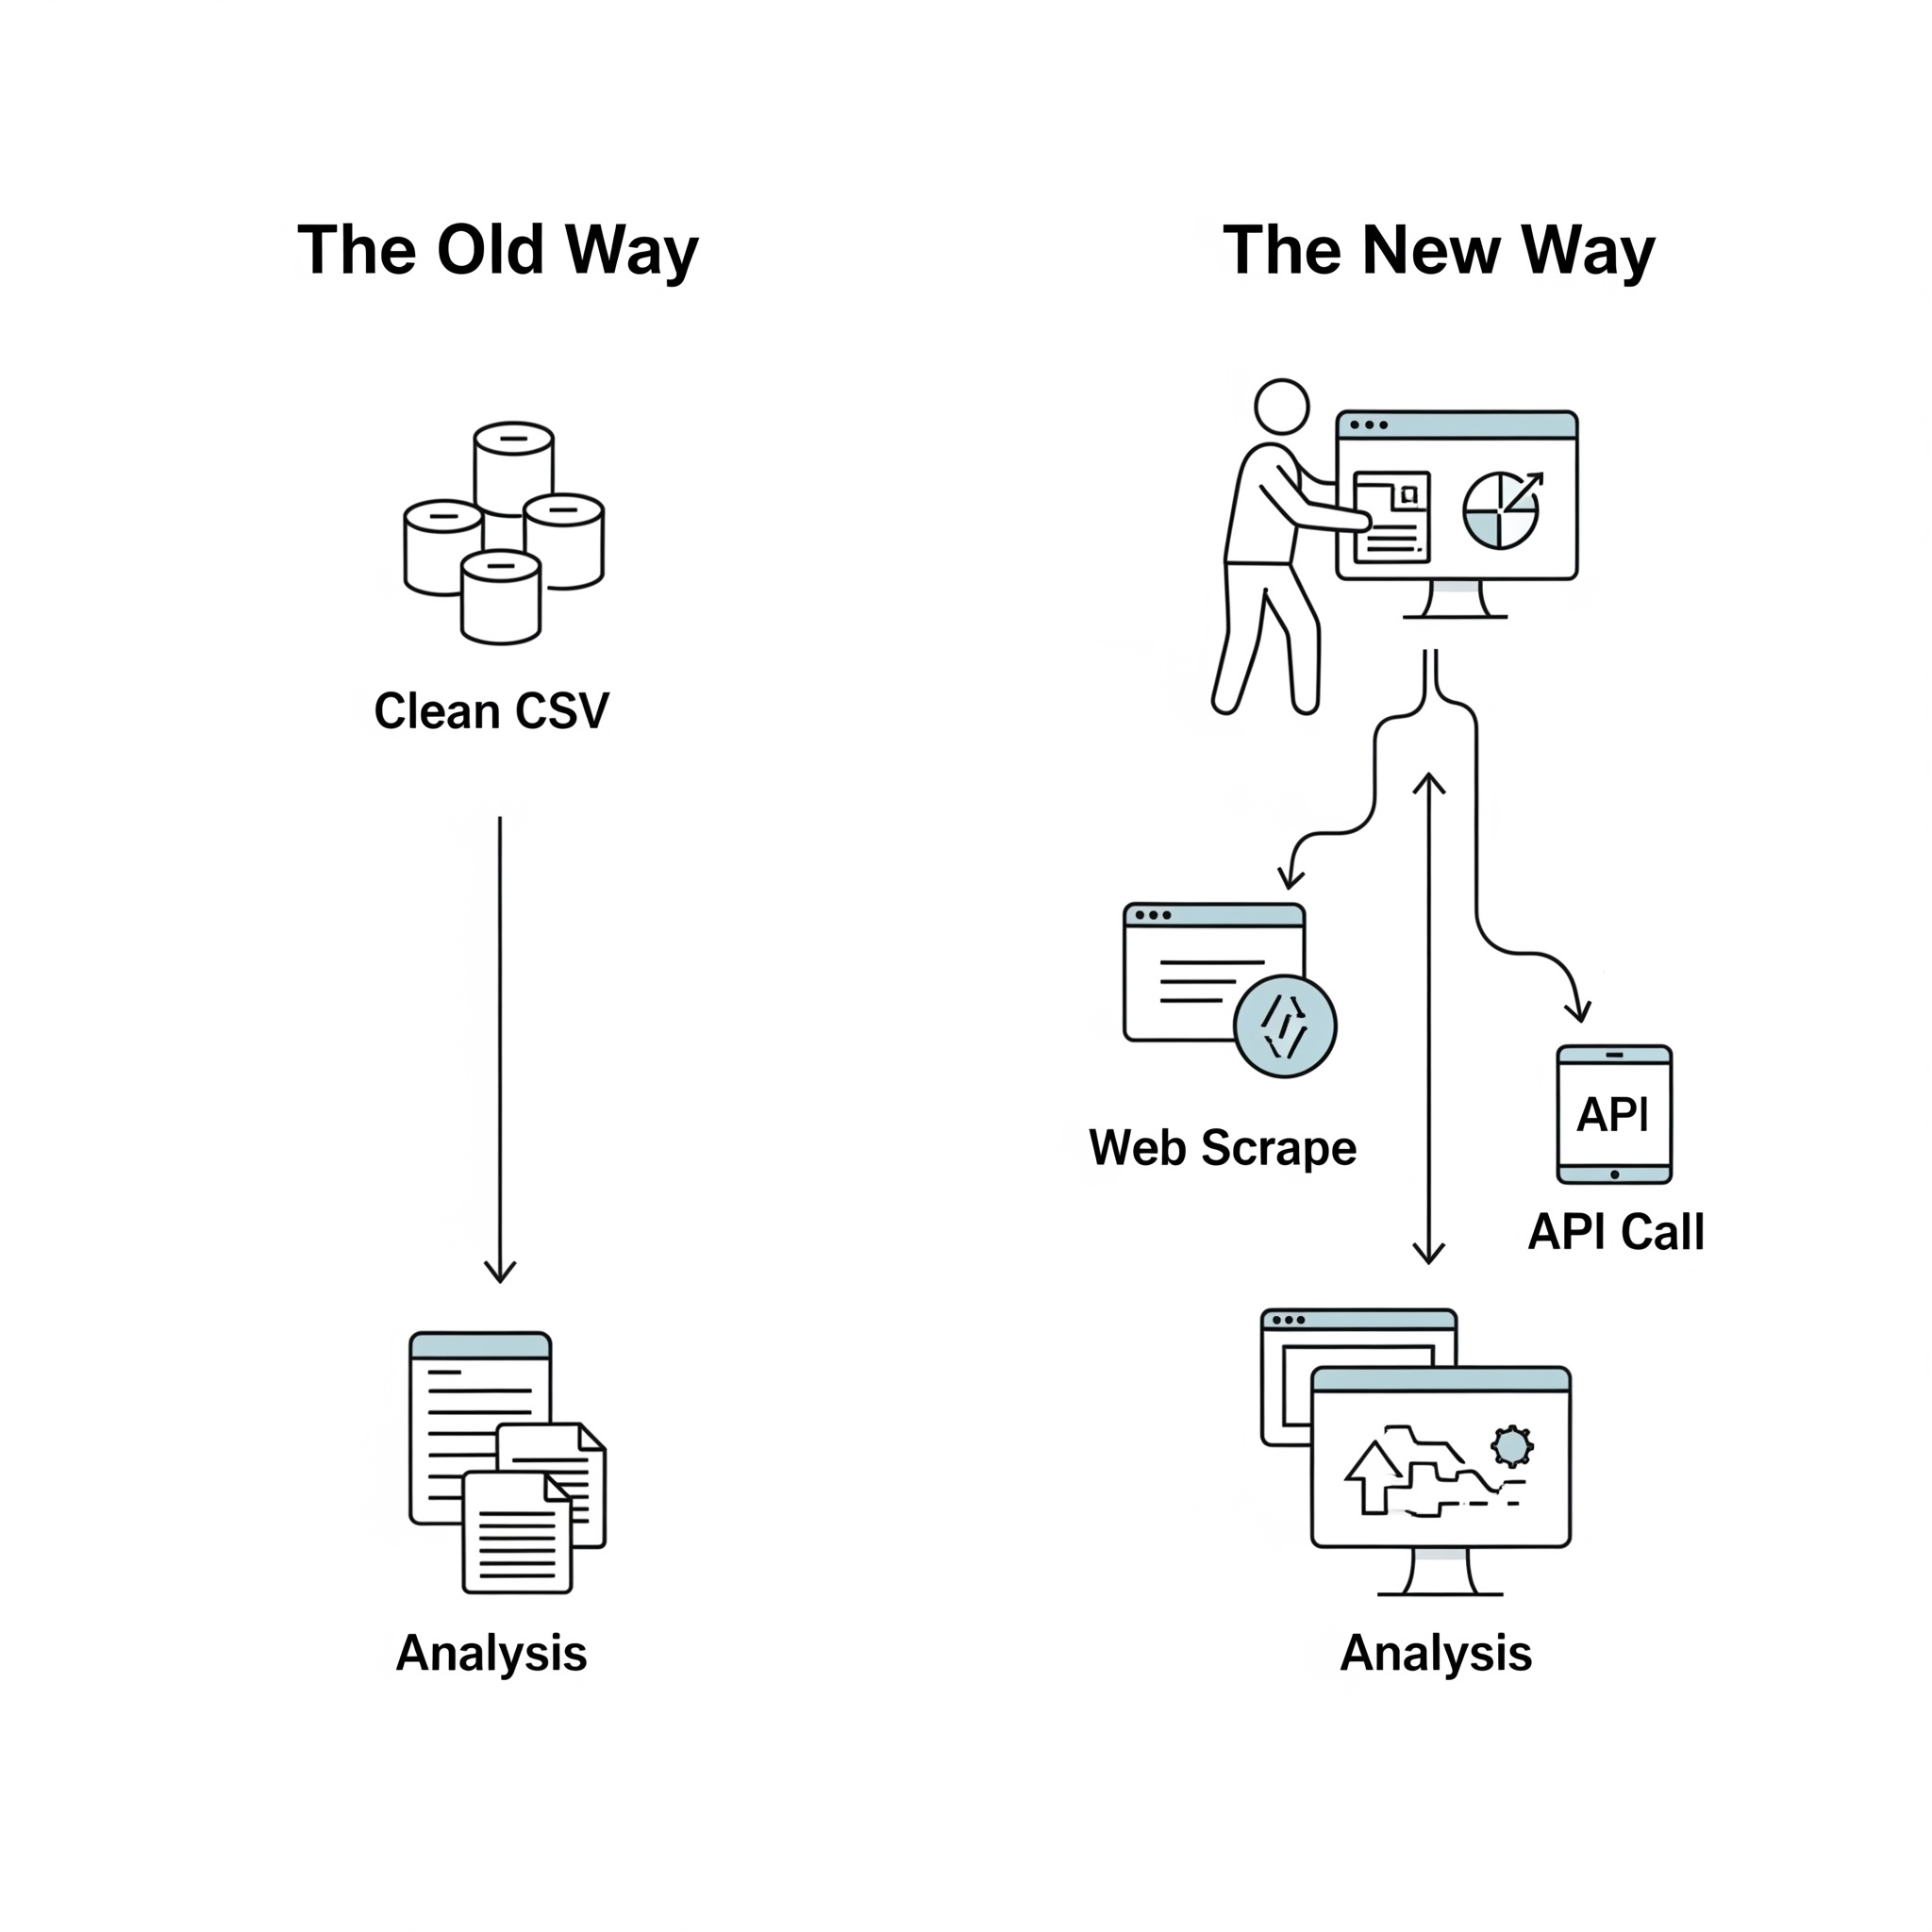
<figcaption aria-hidden="true">New vs Old</figcaption>
</figure>

**Note 3: My Talking Points** The core of this workshop is about a
fundamental shift in how we approach data.

-   We want to move our students away from being passive consumers who
    just wait for a clean CSV file.

-   The goal is to empower them as active seekers who know how to find,
    get, and prepare data themselves.

-   As instructors, our responsibility is changing. We can’t just rely
    on pre-built packages or static datasets anymore. We need to equip
    our students with the skills to extract data, not just consume
    pre-packaged content.

### 3. Why This Matters Now - **The Evolving Data Landscape**

-   **The digital world is not static:** Websites, APIs, and file
    structures constantly change.

-   **Dynamic data is everywhere:** The availability of real-time data
    has grown exponentially, demanding new teaching strategies.

-   **Most courses haven’t caught up:** Introductory statistics and data
    science courses still rely heavily on static files, limiting
    students’ exposure to modern data work.

<figure>
<a
href="https://www.statista.com/statistics/871513/worldwide-data-created/">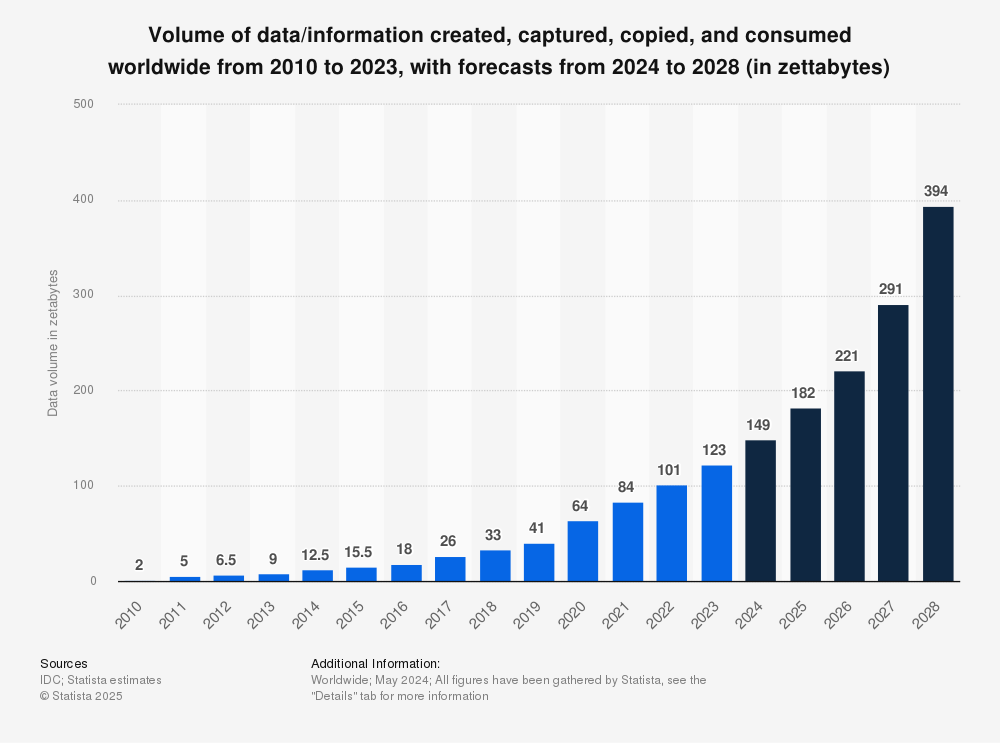</a>
<figcaption>Volume of Data Created (Statista)</figcaption>
</figure>

**Note 4: My Talking Points**

-   So why is this shift so critical right now? Because the world of
    data has fundamentally changed.

-   Websites get redesigned, APIs get version updates, and file
    structures evolve. The methods we teach have to be adaptable.

-   There’s been an explosion in dynamic, frequently updated data,
    especially from web APIs.

-   When I say “dynamic” data, I’m emphasizing external, real-time
    access. Even a flat file can be dynamic if it’s updated regularly,
    but the key skill is learning to get data from a source you don’t
    control.

-   Despite this, most intro courses still use pre-cleaned, static
    datasets. This creates a gap between what students learn in the
    classroom and what they need to do in the real world. Our goal is to
    start closing that gap.

####———————

#### Q3.

**(Discussion):** How does teaching students to extract their own
**dynamic data** better prepare them for real-world data science careers
compared to only providing them with clean, **static** datasets?

#### Ans Q3.

Teaching students to work with **dynamic data** directly addresses the
gap between academic exercises and real-world job requirements. Unlike
static files, dynamic data from APIs and websites forces students to:

1.  **Develop Problem-Solving Skills**
2.  **Become Resourceful.**
3.  **Gain Relevant Technical Experience.** ####———————

### 4. Static and Dynamic Sources of Data Extraction

**2.a. Static Files or Sources Extraction**

<figure>
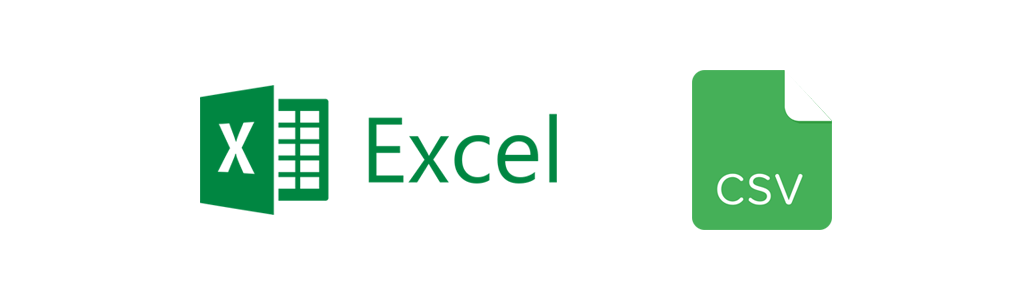
<figcaption aria-hidden="true">Excel and CSV</figcaption>
</figure>

-   Examples: CSV, Excel files

-   Typically unchanging unless manually edited

-   Often pre-loaded into classroom activities

-   May still require cleaning (e.g., column names, missing data)

-   Note 4:

Messy data is not always a bad thing

**2.b. Dynamic Sources Extraction**

-   **Definition**: Data sources that update over time or are externally
    controlled (i.e., you don’t own the source)

-   **Two primary types:**

1.  Application Programming Interface **APIs** – Designed to serve
    structured data upon request (e.g., player stats, weather)

<figure>
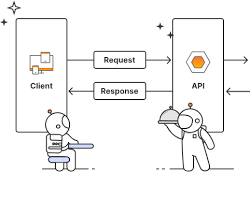
<figcaption aria-hidden="true">API Image</figcaption>
</figure>

1.  Hypertext Markup Language **HTML/Web Pages** – Seen as dynamic when
    content changes (especially sports, news, etc.)

<figure>
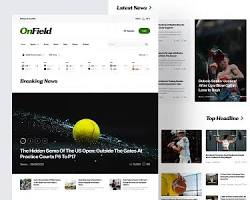
<figcaption aria-hidden="true">HTML Image</figcaption>
</figure>

-   HTML pages are primarily designed for human readability, while APIs
    are designed for structured machine access. Both offer pathways to
    dynamic data, each with different advantages and challenges.

-   Bridging the gap between classroom exercises and real-world data
    practice requires that students learn not just how to analyze data —
    but how to find it, extract it, and prepare it themselves.

-   Note 5:

    -   HTML *can be treated* as static or dynamic depending on how
        frequently the page updates. For this workshop, **we treat HTML
        as dynamic**, especially for sports data.

####———————

#### Q4.

**(Open-Ended):** The section above presents two main types of dynamic
data sources: **APIs** and **HTML web pages**. Given that APIs are
designed for machines and HTML is for humans, why would a data analyst
generally *prefer* to use an API if one is available? What specific
problems might you avoid by using an API instead of scraping a webpage?

#### Ans Q4.

A data analyst prefers using an API because it offers a more stable,
efficient, and reliable way to access data.

APIs provide clean, structured data (like JSON) that is easy to work
with, which avoids the main problems of web scraping: scripts that break
when website visuals change and the extensive cleaning required to
separate data from HTML formatting.

####———————

### 5. What are Web APIs?

-   There are many kinds of APIs, but in this workshop, we’ll focus
    specifically on **web APIs** — tools designed to let us request and
    retrieve data from online sources.

-   In R, we’ll act like a piece of software making those requests,
    allowing us to query live data programmatically.

<figure>
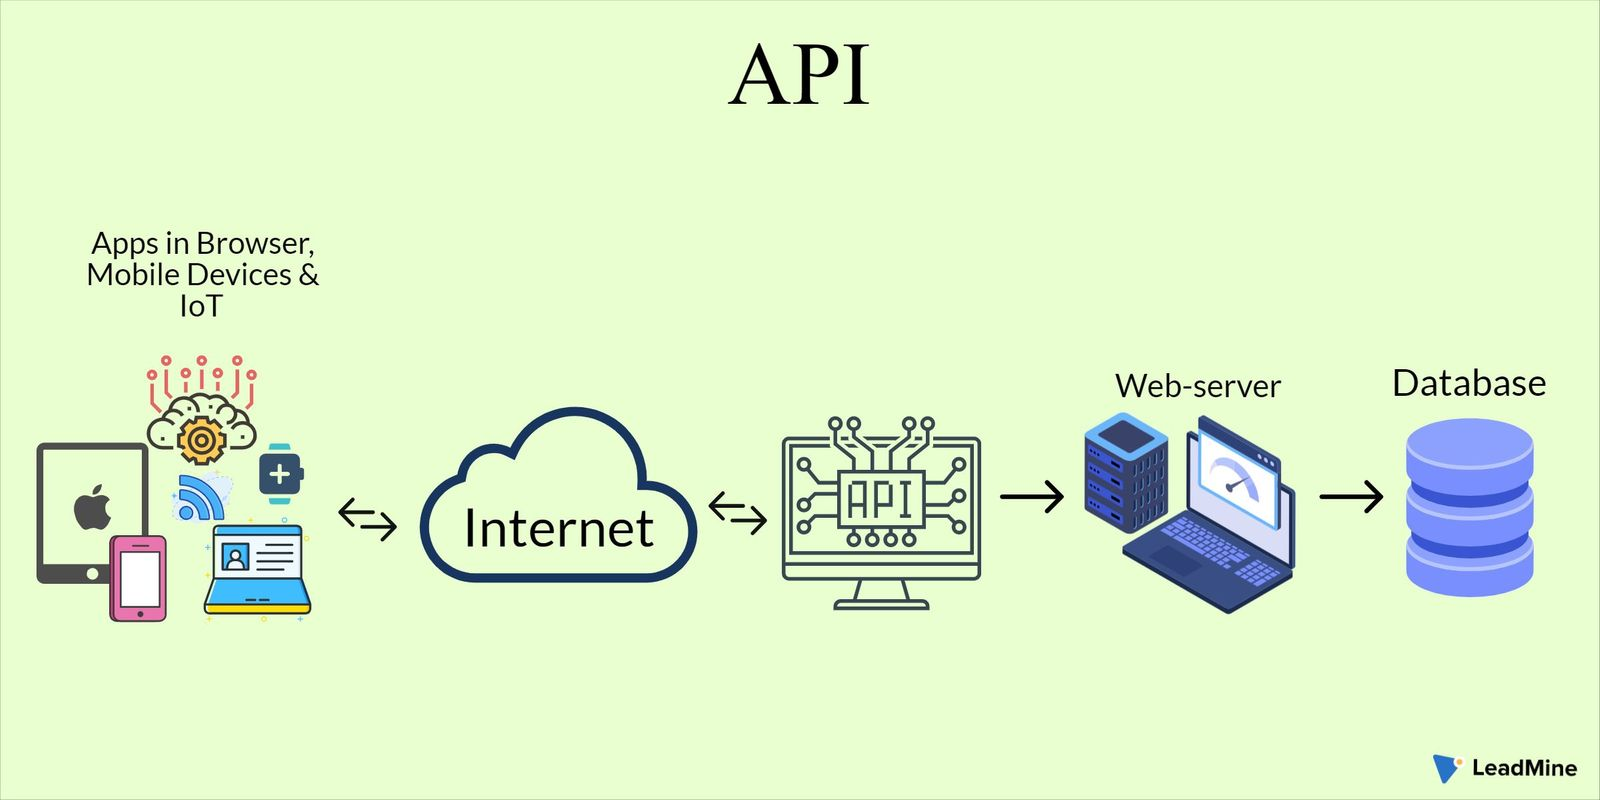
<figcaption aria-hidden="true">Flow of Data via API
(vrogue.co)</figcaption>
</figure>

-   API stand for Application Programming Interfaces

-   It is a way for software to communicate with one another

-   One way it work is that it allow programs **to request a query from
    a data base** directly from external servers in a structured format
    (most often JSON).

####——————— \#### Q5. **(Open-Ended):** If you think of getting data
from an API like ordering food at a restaurant, what roles do you, the
menu, the waiter, and the kitchen play in this analogy?

#### Ans Q5.

In this analogy: \* You are the **client** (the program) who wants
something. \* The menu is the **API documentation**, showing what you
can order (what data you can request). \* The waiter is the **API**
itself—you give your request to them, and they handle the communication
with the kitchen. \* The kitchen is the **server/database**, which
prepares your order (the data) and gives it back to the waiter.

####———————

**JSON**

    {
      "player": "LeBron James",
      "points": 27.1,
      "team": "Lakers"
    }

-   The **keys** are `players`, `points`and `team`
-   The **values** for the corresponding keys are `LeBron James`,
    `27.1`, `Lakers`

Note 7:

-   There are a lot of acronyms

-   JSON - Java Script Object Notation - javascript is web developing
    software (chatgpt)

-   Most times, Information/data is transferred from database to user in
    a JSON

-   (Mention Querying data base more as an action)

Note 8:

-   Describe Image `Flow of Data via API (vrogue.co)`

-   A user sends a request via the internet → the API talks to the
    server → the server queries the database → the API responds with
    data, often as JSON. (Mention Querying data base more as an action)

-   Learning to work with web APIs teaches students more than just how
    to extract data — it gives them the tools to:

    -   Locate relevant APIs (e.g., weather, sports, music)
    -   Construct and test their own API requests
    -   Interpret JSON responses (including nested structures)
    -   Transform the results into tidy formats ready for analysis

**More on APIs**

-   APIs aren’t just technical tools, they’re increasingly the primary
    way to access and query data stored in external databases.

-   In today’s fast-changing digital environment, students must be
    equipped to retrieve and work with information from live, external
    sources, not just rely on pre-cleaned datasets.

Enough talk let’s make some **requests**…

-   Note 9:

-   This is what pushes students from passive observers of data to
    active agents in its collection, structure, and use.

-   It aligns closely with what real-world data science jobs require,
    especially when you’re no longer just analyzing data, but acquiring
    it.

-   The use of APIs requires keys, which are unique and secret codes
    that are used to authorize your request and identify your user and
    billing information.

-   Consequently, keeping these codes secret is imperative.

-   To do so, store API keys in environment files which reside on your
    computer, and not coded into variables or available in plain text on
    your working files.

### 6. Using `tidycensus`

**Say we want to answer the following question:**

*Which 10 counties in Iowa had the highest median household income in
2022?*

**Introduction to `tidycensus`**

The `tidycensus` package is a wrapper for the U.S. Census Bureau’s APIs.
It is designed to make it simple to download, manage, and map Census
data within R. It handles the API requests and returns clean, tidy data
frames ready for analysis.

**Step 1: Get a Census API Key**

Before using the API, you need a key. This is a simple, one-time
process.

1.  Go to the Census API Key request page:
    <https://api.census.gov/data/key_signup.html>
2.  Fill out the short form with your organization and email address.
3.  Your API key will be sent to your email almost immediately. Keep it
    handy.

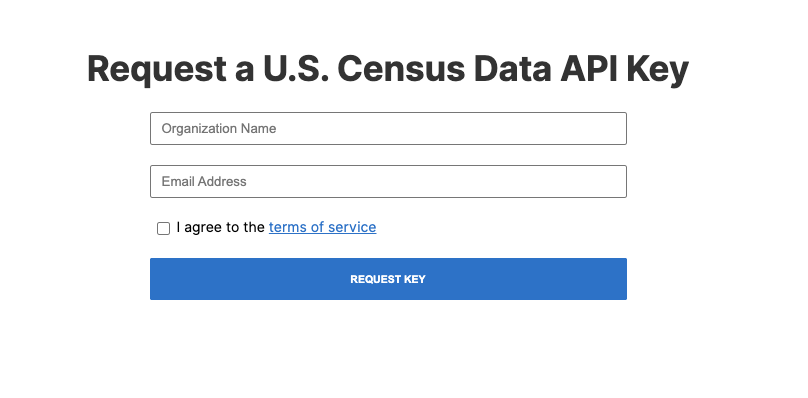

Notes:

-   Every API works differently

-   We are using a library mechanism now, but we will get into the guts
    during the next session

**Step 2: Set Up Credentials**

The `tidycensus` package includes a function to store your API key
securely in the `.Renviron` file, so you only have to do this once per
computer.

In [ ]:
## EMPTY VERSION
# install.packages("____") 

In [ ]:
## FILLED VERSION
# install.packages("tidycensus") 

In [ ]:
## EMPTY VERSION
# The `install = TRUE` argument saves it to your .Renviron file for future use.
# census_api_key("____", install = ____)

In [ ]:
## FILLED VERSION
# Replace "YOUR_KEY_HERE" with the key you received via email.
# The `install = TRUE` argument saves it to your .Renviron file.

# census_api_key("YOUR_KEY_HERE", install = TRUE)

\[We are going to run this in a moment\]

**Step 3: Load Required Packages**

For this analysis, we’ll need `tidycensus` for data retrieval and
`dplyr` and `ggplot2` for data wrangling and visualization.

In [ ]:
## EMPTY VERSION
# library(____)      ## Data Extraction     --- E
# library(____)           ## Data Transformation --- T - Data Frame Manipulation
# library(____)         ## Data Transformation --- T - String Manipulation
# library(____)         ## Data Visualization  --- V

In [ ]:
## FILLED VERSION
library(tidycensus)      ## Data Extraction     --- E
library(dplyr)           ## Data Transformation --- T - Data Frame Manipulation
library(stringr)         ## Data Transformation --- T - String Manipulation
library(ggplot2)         ## Data Visualization  --- V

**Step 4: Find Your Variables**

The Census Bureau offers thousands of variables. A key step is finding
the specific codes for the data you need. We can use the
`load_variables()` function to search. Let’s find the variable code for
“Median Household Income” in the 2022 American Community Survey (ACS)
5-year estimates.

In [ ]:
## EMPTY VERSION
# Load all variables from the 2022 5-year ACS dataset
# v22 <- load_variables(____, "acs5")

# Search for the variable we want by filling in the string below
# v22 %>% 
#   filter(grepl("____", label, ignore.case = TRUE))

In [ ]:
## FILLED VERSION
# Load all variables from the 2022 5-year ACS dataset
v22 <- load_variables(2022, "acs5")
## *********** Look at how many rows this data frame has    ************* ##


# Search for the variable we want
v22 %>% 
  filter(grepl("Median Household Income", label, ignore.case = TRUE))

The search reveals that the variable code we want is **`B19013_001`**.

**Step 5: Request Census Data**

Now we use the main function, `get_acs()`, to download the data. We’ll
request the median household income for every county in Iowa.

In [ ]:
## EMPTY VERSION
# Request the data for Iowa counties
# iowa_income_df <- get_acs(
#   geography = "____",
#   variables = c(med_income = "____"), # Provide the variable code
#   state = "____",
#   year = ____
# )

In [ ]:
## FILLED VERSION
# Request the data for Iowa counties
iowa_income_df <- get_acs(
  geography = "county",
  variables = c(med_income = "B19013_001"), # Provide the variable code
  state = "IA",
  year = 2022
)

**Step 6: Explore and Visualize the Data**

Use `glimpse()` to examine the data structure. You’ll see it returns a
tidy data frame with columns for the estimate and the margin of error
(`moe`).

In [ ]:
## EMPTY VERSION
# glimpse(____)

In [ ]:
## FILLED VERSION
glimpse(iowa_income_df)

Now, let’s create a simple plot of the 10 counties with the highest
median income.

In [ ]:
## EMPTY VERSION
# iowa_income_df %>%
#   slice_max(order_by = ____, n = ____) %>%
#   ggplot(aes(x = ____, y = reorder(NAME, ____))) +
#   geom_col(fill = "dodgerblue") +
#   labs(
#     title = "____",
#     x = "____",
#     y = "____"
#   ) +
#   theme_minimal()

In [ ]:
## FILLED VERSION
iowa_income_df %>%
  slice_max(order_by = estimate, n = 10) %>%
  ggplot(aes(x = estimate, y = reorder(NAME, estimate))) +
  geom_col(fill = "dodgerblue") +
  labs(
    title = "Top 10 Iowa Counties by Median Household Income (2022)",
    x = "Median Household Income (USD)",
    y = "County"
  ) +
  theme_minimal()

####——————— \#### Q6.

**(Discussion):** We now have a list of the top 10 wealthiest counties
from the Census API. What if we want to ask a new, historical question,
like *“When was each county founded?”* Can we answer this using our
current `iowa_income_df` data? Why or why not? \#### Ans Q6.

No, we cannot. The `iowa_income_df` dataframe contains only the
demographic data provided by the Census API (income, margin of error,
etc.).

To answer a historical question like this, we need to find a new data
source that contains this information, such as an online encyclopedia
like Wikipedia. This illustrates a common scenario in data analysis
where a single data source is not enough, motivating the need to
**scrape** information from other websites to enrich our dataset.

####———————

### 7. What is Web Scraping?

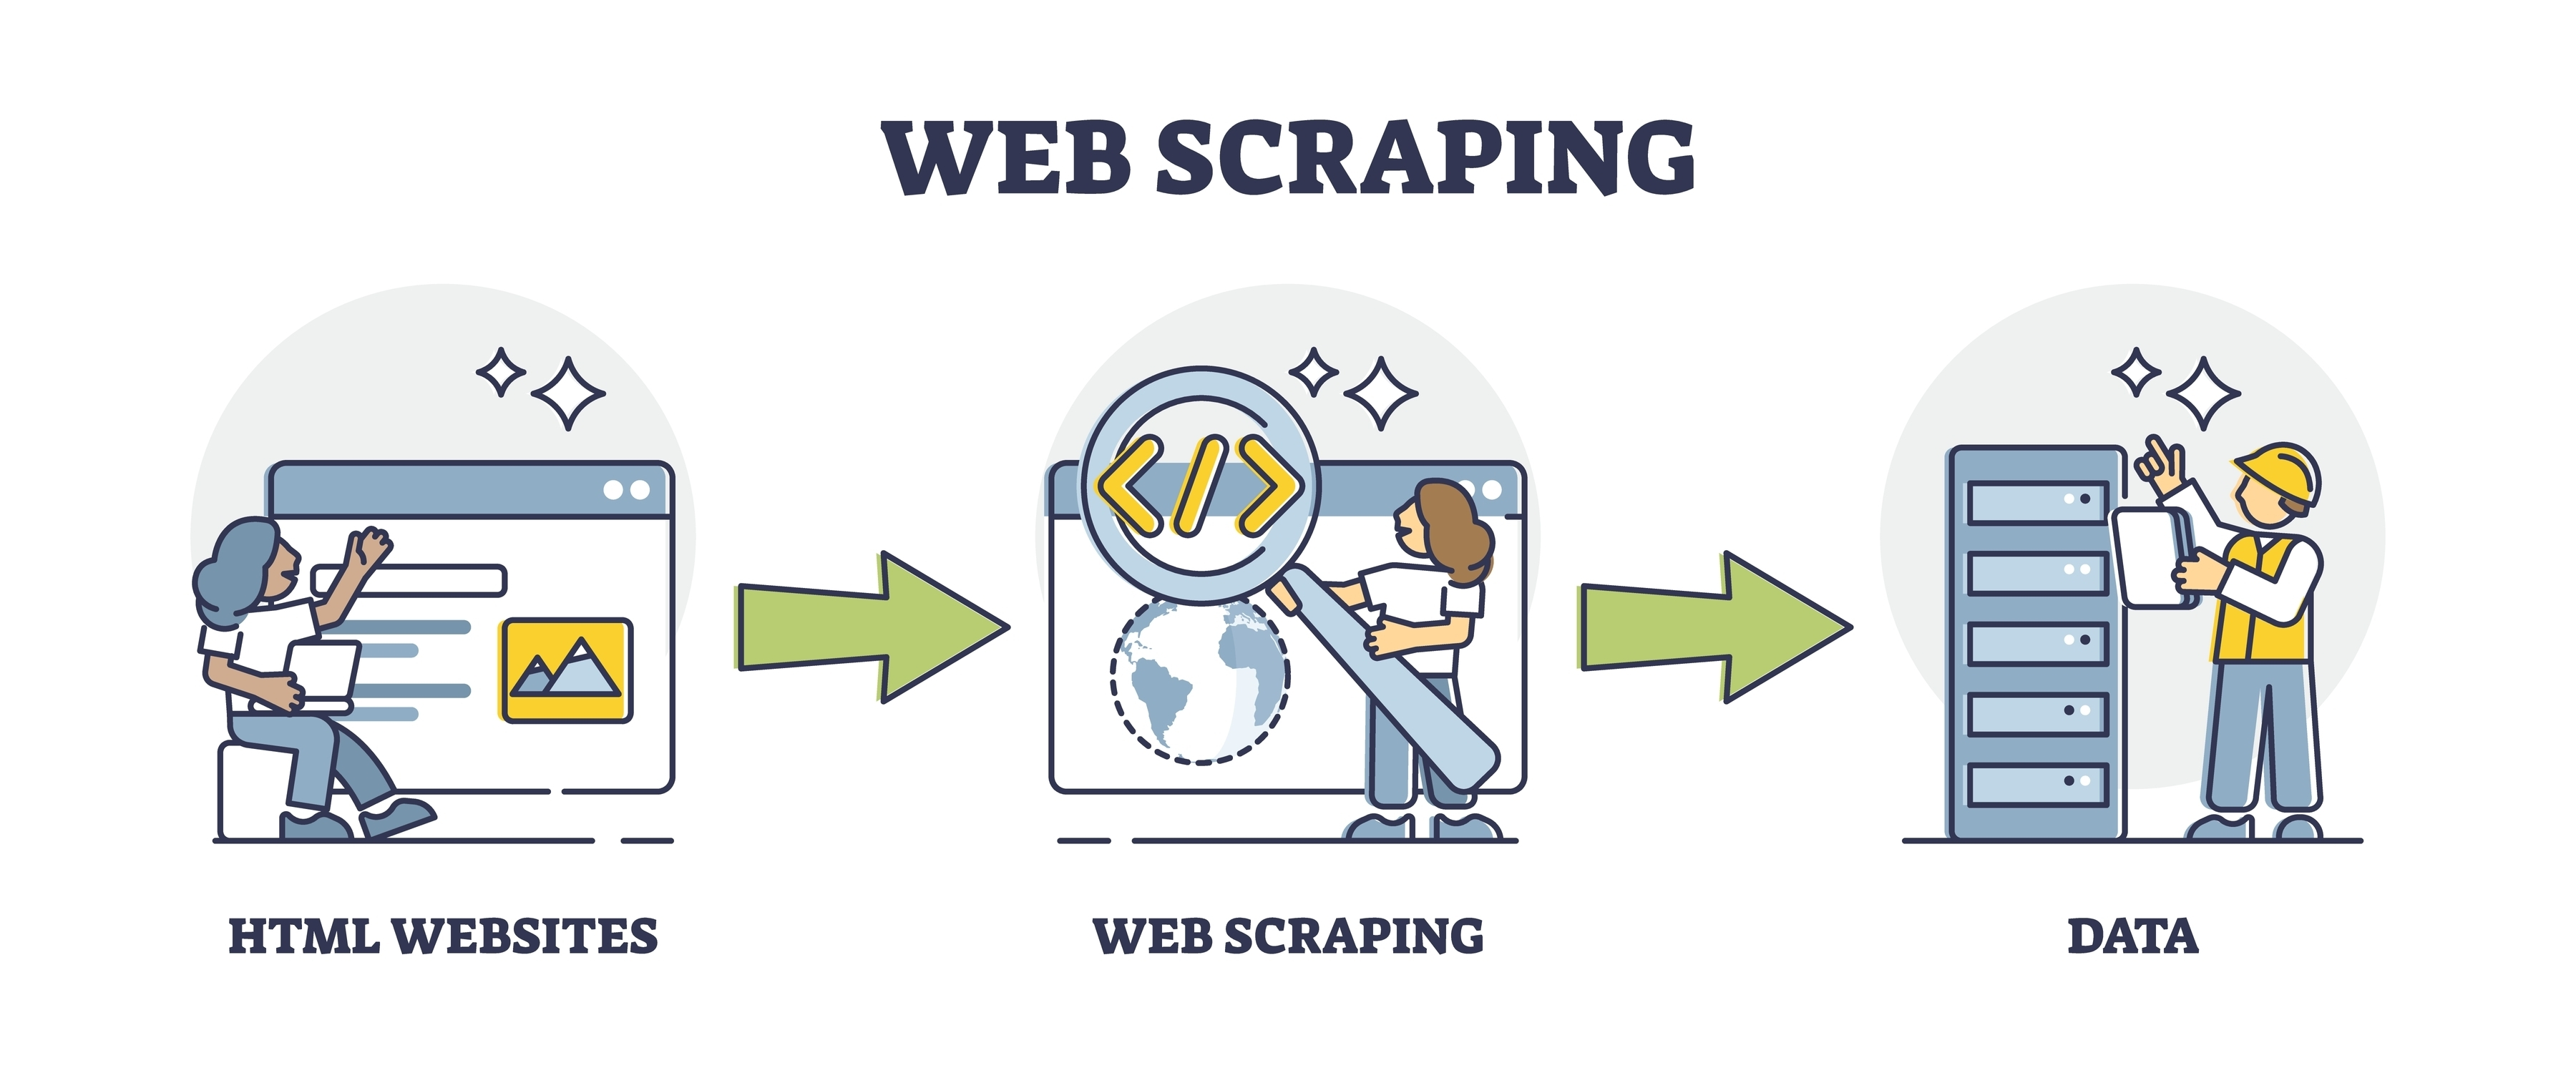

-   Websites are structured using HTML (Hypertext Markup Language),
    which acts as the backbone for displaying and organizing content on
    the internet.

-   When data is arranged in rows and columns like sports stats,
    schedules, or financial figures, HTML tables offer a clear and
    structured way to present that information directly on the page.

-   Tables make it easy for both humans and computers to interpret
    patterns, compare values, and extract key insights.

Note 12:

-   We don’t want to waste time copying and pasting tables into a CSV,
    then reformatting and cleaning them again in R.

-   Ideally, we want to access the data directly and bring it into R in
    a structured format, where we expect to do some cleaning, but we
    skip the unnecessary manual steps.

**HTML Code Visual**

Below is an image of code for html table and the actual table that it
would produce

<figure>
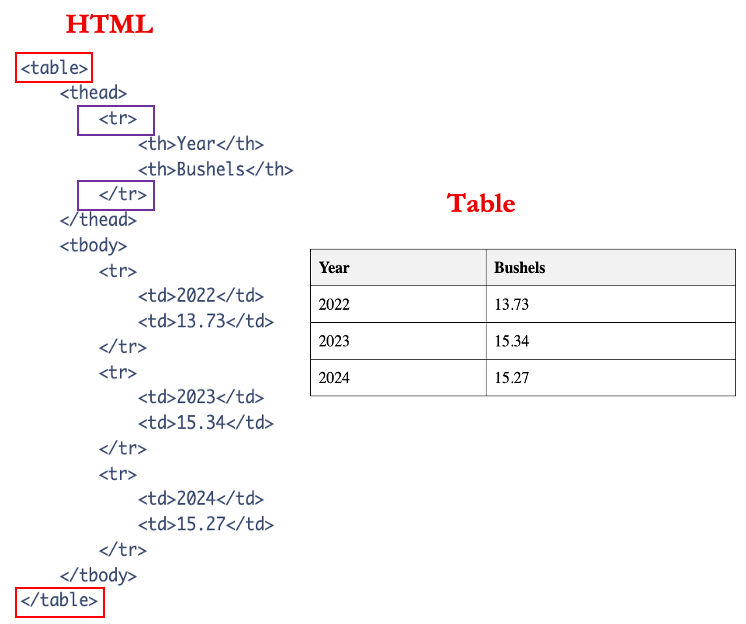
<figcaption aria-hidden="true">Process of HTML Scraping
(sstm2.com)</figcaption>
</figure>

Note 13:

-   Highlight the following concepts:

    -   Beginning and the end of table
    -   The column name
    -   Each Row
    -   How it translate into a human readable table

-   Emphasize that we’re only focusing on `<table>` tags for this
    workshop

####———————

#### Q7.

**(Discussion):** Now that we see how an HTML `<table>` tag structures
data on a webpage, what logical steps would an R function need to take
to automatically pull that specific table out of the raw HTML and turn
it into a usable data frame?

#### Ans Q7.

An R function for web scraping would need to perform a sequence of
tasks:

1.  **Read the Page:** First, it must download the entire HTML source
    code from the specified URL.
2.  **Locate the Table:** It then needs to parse through the HTML text
    to find the specific `<table>...</table>` tags we want to extract.
3.  **Parse the Structure:** Finally, it must interpret the tags inside
    the table—like `<tr>` for rows and `<th>` and `<td>` for cells—and
    assemble them into the columns and rows of an R data frame.

####———————

### 8. Using `htmltabs`

**A New Question**

Our Census data tells us about income, but what if we want to answer a
related historical question that isn’t in that dataset?

*Of the top 10 wealthiest counties, when was each one founded and what
is its county seat?*

To answer this, we need to get data from another source. A perfect place
to look is Wikipedia. This is where web scraping comes in.

------------------------------------------------------------------------

**Introduction to `htmltab`**

In [ ]:
# First, install the 'devtools' package if you haven't already:
# install.packages("devtools")

# Then, use devtools to install 'htmltab' directly from GitHub:
# devtools::install_github("gato365/htmltab")

Web scraping is the process of extracting information directly from
websites. The `htmltab` package is a tool designed for one specific kind
of scraping: pulling clean data tables out of an HTML web page.

Note 14:

-   You don’t need to install this package right now, but if you do, be
    aware that it’s no longer available on CRAN (the official R package
    repository).

-   It used to be, but now it must be installed from GitHub instead.
    Here’s how to do that:

**Step 1: Load the Package**

First, we need to load the `htmltab` library.

In [ ]:
library(htmltab)

**Step 2: Identify the Target URL**

Next, we need the URL of the page we want to scrape. It’s always a good
idea to visit the URL in a web browser first to inspect the page and see
what tables are there.

In [ ]:
## EMPTY VERSION
# url <- "____"

In [ ]:
## FILLED VERSION
url_doc <- "https://en.wikipedia.org/wiki/List_of_counties_in_Iowa"

------------------------------------------------------------------------

Note 15: Lets go to the url via Web Broswer

**Step 3: Scrape the HTML Table**

The `htmltab()` function requires two main arguments: the `url` and
`which`, which is the position of the table on the page (e.g., is it the
1st table, 2nd, etc.?). Often, you have to guess the number.

Let’s try to get the main table of counties. Is it table 1 or 2?

In [ ]:
## EMPTY VERSION
# Try guessing the table number
# iowa_wiki_df <- htmltab(doc = url, which = ____)

# Let's look at the result
# head(iowa_wiki_df)

In [ ]:
## FILLED VERSION
# Let's try table 1... this doesn't look right.
iowa_wiki_df_1 <- htmltab(doc = url_doc, which = 1)
head(iowa_wiki_df_1)

# Let's try table 2... this looks perfect!
iowa_wiki_df <- htmltab(doc = url_doc, which = 2)

|  |
|-------|
| Note 15: |
| \- Unless you know HTML and want to look at the source code or you what exactly a table looks like you will have to guess sometimes |
| \- We can get the warning to go away by … |
| **Step 4: Explore the Scraped Data** |
| Now that we have the correct table, let’s explore it with `glimpse()` to see the column names and data types. |
| ::: {.cell} |
| `{.r .cell-code} ## EMPTY VERSION # glimpse(____)` ::: |
| ::: {.cell} |
| `{.r .cell-code} ## FILLED VERSION glimpse(iowa_wiki_df)` ::: |

-   Note 16:

-   This table is considered static because the county information
    doesn’t change frequently.

-   However, for data that updates regularly like daily baseball
    statistics—it’s better to use a more robust method for extracting
    the data instead of relying on `htmltab`.

-   Unlike an API, which often returns clean data types, web scraping
    can result in messy column names (like `County seat[3]`) and data
    stored as characters instead of numbers. This is a normal part of
    the process.

**Step 5: Join the API and Scraped Data**

To answer our driving question, we can now join our `iowa_income_df`
(from the Census API) with our `iowa_wiki_df` (from web scraping). We
will need to rename the columns of the scraped data to prepare for the
join.

In [ ]:
## EMPTY VERSION
# # First, select and rename columns from the scraped data
# iowa_details_df <- iowa_wiki_df %>%
#   select(NAME = `____`, seat = `____`, established = `____`)
# 
# # Now join it with our income data
# final_df <- left_join(____, ____, by = "NAME")
# 
# # View the result!
# final_df

In [ ]:
## FILLED VERSION
# First, select and rename columns from the scraped data
iowa_details_df <- iowa_wiki_df %>%
  select(NAME = `County`, seat = `County seat`, established = `Est.`)

# Get just the top 10 counties from our census data
top_10_income_df <- iowa_income_df %>%
  slice_max(order_by = estimate, n = 10) %>% 
  mutate(NAME = str_remove(NAME,", Iowa"))

# Now join it with our income data
final_df <- left_join(top_10_income_df, iowa_details_df, by = "NAME")

# View the result!
final_df

Check out article for more details of scraping data from the web:

[Web Scraping in the Statistics and Data Science Curriculum: Challenges
and Opportunities - Mine Dogucu & Mine
Çetinkaya-Rundel](https://www.tandfonline.com/doi/full/10.1080/10691898.2020.1787116)

-   Much like APIs, lots of relevant and useful information is available
    directly on **webpages**, which are **readable by humans** rather
    than APIs which are designed for **machine access**.
-   By learning this skill, students are able to:
    -   **Locate relevant sources** (e.g., sports data from Pro Football
        Reference)
    -   **Understand how websites deliver and organize content**
    -   **Transform and clean data** for analysis and visualization
-   Often times, HTML tables contain **unexpected structures** or data
    types (images, links, etc) and can present a challenge that develops
    not only **data cleaning skills**, but **intention, planning, and
    adaptability** when handling and analyzing difficult data.

####———————

#### Q8.

**(Open-Ended):** Before performing the `left_join`, the code includes
the line `mutate(NAME = str_remove(NAME, ", Iowa"))`. Why was this data
cleaning step on the `NAME` column absolutely necessary for the join to
be successful?

#### Ans Q8.

This step was necessary because the **join key** (`NAME`) had different
formats in the two dataframes.

The Census API data included the state in the county name (e.g.,
`"Dallas County, Iowa"`), while the scraped Wikipedia data did not
(e.g., `"Dallas County"`). For a `join` to work correctly, the values in
the key column must match **exactly**. By removing `", Iowa"`, we
standardized the `NAME` column across both datasets, allowing R to
successfully match the rows for each county.

####———————

## Part 3. Session 1 Activity: Census API and HTML in Practice

This activity will give you a chance to apply the skills you’ve just
learned. We’ll start by fetching live demographic data for Iowa,
visualize it, and finally, join it with data scraped from a Wikipedia
page.

*Note: This assumes you have already set up your Census API key.*

### 1. Task 1: Get County-Level Census Data

Your first task is to get demographic data for all counties in Iowa
using `tidycensus`. Let’s grab two variables at once: **median age**
(`B01002_001`) and **total population** (`B01003_001`). After retrieving
the data, use `glimpse()` to inspect its structure.

In [ ]:
## EMPTY VERSION
# iowa_df <- get_acs(
#   geography = "____",
#   variables = c(
#     median_age = "____", # Median Age Code
#     total_pop = "____"   # Total Population Code
#     ), 
#   state = "____",
#   year = 2022
# )
# 
# ____(iowa_df)

In [ ]:
## FILLED VERSION
iowa_df <- get_acs(
  geography = "county",
  variables = c(
    median_age = "B01002_001",
    total_pop = "B01003_001"
    ), 
  state = "IA",
  year = 2022
)

glimpse(iowa_df)

####——————— \#### Q9.

Take a look at the output from `glimpse()`. How is this data structured
differently than a typical “wide” dataset with one row per county? What
does the `moe` column represent?

#### Ans Q9.

The data is in a **long format**, with one row for each variable
(`median_age`, `total_pop`) per county, rather than one row per county
with different columns for each variable. This is a common, tidy format
for API results.

The `moe` column stands for **Margin of Error**. Because the American
Community Survey (ACS) is a sample-based survey and not a full count,
the `moe` provides a measure of the estimate’s uncertainty.

####———————

### 2. Task 2: Wrangle and Visualize the Data

Now, let’s turn that raw data into an insight. Your task is to create a
scatter plot to see the relationship between a county’s population and
its median age. You will need to:

1.  Use `pivot_wider()` to transform the data from a long to a wide
    format, creating separate columns for `median_age` and `total_pop`.
2.  Pipe this into `ggplot` to create a scatter plot.

In [ ]:
## EMPTY VERSION
# iowa_df %>% 
#   select(____, NAME, variable, estimate) %>% # Select only needed columns
#   pivot_wider(names_from = ____, values_from = ____) %>% 
#   ggplot(aes(x = ____, y = ____)) +
#   geom_point() + 
#   theme_bw()

In [ ]:
## FILLED VERSION
iowa_df %>% 
  select(GEOID, NAME, variable, estimate) %>% # Select only needed columns
  pivot_wider(names_from = variable, values_from = estimate) %>% 
  ggplot(aes(x = total_pop, y = median_age)) +
  geom_point(alpha = 0.7) +
  scale_x_log10() + # Use a log scale for population
  labs(
    title = "Population vs. Median Age in Iowa Counties",
    x = "Total Population (Log Scale)",
    y = "Median Age"
  ) +
  theme_bw()

####———————

#### Q10.

Based on your plot, what relationship, if any, do you observe between a
county’s population and its median age in Iowa?

#### Ans Q10.

The plot generally shows a negative correlation. Counties with smaller
populations (further to the left) tend to have a higher median age.
Conversely, the counties with the largest populations, like Polk County
(Des Moines), often have a lower median age. This might suggest that
younger people are more concentrated in urban centers.

####———————

### 3. Task 3: Join with Scraped HTML Data

APIs give us great data, but sometimes we need to supplement it. Let’s
grab the county seat for each Iowa county from Wikipedia and join it
with our Census data.

The URL is: `"https://en.wikipedia.org/wiki/List_of_counties_in_Iowa"`

Your task is to scrape the main table, select and rename the relevant
columns, and then perform a `left_join` to add the county seat to your
`tidycensus` data.

In [ ]:
## EMPTY VERSION
# library(htmltab)
# 
# # 1. Scrape the data
# url <- "https://en.wikipedia.org/wiki/List_of_counties_in_Iowa"
# scraped_df <- htmltab(doc = url, which = ____)
# 
# # 2. Clean and select scraped data
# seats_df <- scraped_df %>% 
#   select(NAME = `____`, seat = `____`)
# 
# # 3. Widen the census data (from previous step)
# iowa_wide_df <- iowa_df %>% 
#   select(GEOID, NAME, variable, estimate) %>%
#   pivot_wider(names_from = variable, values_from = estimate)
# 
# # 4. Join the two datasets
# combined_df <- left_join(____, ____, by = "NAME")
# 
# head(combined_df)

In [ ]:
## FILLED VERSION


# 1. Scrape the data
url <- "https://en.wikipedia.org/wiki/List_of_counties_in_Iowa"
scraped_df <- htmltab(doc = url, which = 2)

# 2. Clean and select scraped data
seats_df <- scraped_df %>% 
  select(NAME = `County`, seat = `County seat[3]`)

# 3. Widen the census data (from previous step)
iowa_wide_df <- iowa_df %>% 
  select(GEOID, NAME, variable, estimate) %>%
  pivot_wider(names_from = variable, values_from = estimate)

# 4. Join the two datasets
combined_df <- left_join(iowa_wide_df, seats_df, by = "NAME")

head(combined_df)

####——————— \#### Q12.

What was the biggest challenge in joining the data from `tidycensus` and
the scraped Wikipedia table?

#### Ans Q12.

The biggest challenge is ensuring the **join key** is clean and matches
between the two datasets. `tidycensus` provides clean county names
(e.g., “Polk County, Iowa”), while Wikipedia’s table might just say
“Polk”. In this case, `htmltab` was smart enough to just grab “Polk
County”, but we had to rename the columns (`County` to `NAME`) to make
the join work. In other cases, you might need to use functions from
`stringr` to clean and standardize the names before you can successfully
join the tables.

####———————

## Part 4. Reflection

-   What did we learn?

-   How does this connect to the original **Goals & Objectives** of the
    session?

-   How do you see yourself using this in your classroom?

-   What kinds of APIs or HTML sources would be most relevant for your
    students?